## You can visit the Google-Colab:
https://colab.research.google.com/drive/15byS0uVBEGVHAZodSCEOPCVW4XRJvlmd?usp=sharing


**x1 is weather type (0 = partly cloudy, 1 = cloudy, 2 = sunny)** <br>
**x2 is atmospheric pressure (0 = low, 1 = high)**

In [1]:
import numpy as np
x1 = [0, 1, 1, 2, 2, 2]
x2 = [0, 0, 1, 1, 1, 0]
y = np.array([0, 0, 0, 1, 1, 0])

In [2]:
def partition(a):
    return {c: (a==c).nonzero()[0] for c in np.unique(a)}

## Entropy:

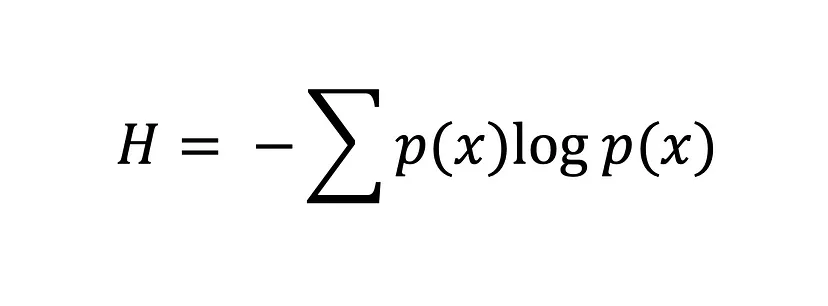

In [3]:
def entropy(s):
    res = 0
    val, counts = np.unique(s, return_counts=True)
    freqs = counts.astype('float')/len(s)
    for p in freqs:
        if p != 0.0:
            res -= p * np.log2(p)
    return res

What is zip in python? [read more](https://www.geeksforgeeks.org/zip-in-python/)

In [4]:
def mutual_information(y, x):

    res = entropy(y)

    # We partition x, according to attribute values x_i
    val, counts = np.unique(x, return_counts=True)
    freqs = counts.astype('float')/len(x)

    # We calculate a weighted average of the entropy
    for p, v in zip(freqs, val):
        res -= p * entropy(y[x == v])

    return res

In [6]:
from pprint import pprint

def is_pure(s):
    return len(set(s)) == 1

def recursive_split(x, y):
    # If there could be no split, just return the original set
    if is_pure(y) or len(y) == 0:
        return y

    # We get attribute that gives the highest mutual information (Information Gain)
    gain = np.array([mutual_information(y, x_attr) for x_attr in x.T])
    selected_attr = np.argmax(gain)

    # If there's no gain at all, nothing has to be done, just return the original set
    if np.all(gain < 1e-6):
        return y


    # We split using the selected attribute
    sets = partition(x[:, selected_attr])

    res = {}
    for k, v in sets.items():
        y_subset = y.take(v, axis=0)
        x_subset = x.take(v, axis=0)

        res["x_%d = %d" % (selected_attr+1, k)] = recursive_split(x_subset, y_subset)

    return res

X = np.array([x1, x2]).T
pprint(recursive_split(X, y))

{'x_1 = 0': array([0]),
 'x_1 = 1': array([0, 0]),
 'x_1 = 2': {'x_2 = 0': array([0]), 'x_2 = 1': array([1, 1])}}


In the original code, this line is like this:
```python
res["x_%d = %d" % (selected_attr, k)] = recursive_split(x_subset, y_subset)
```
 <br> but I found this, `+1` is needed because the indexing is a little confusing!

 now output is more readable